
## **KELOMPOK 3**

| NAMA                  | NIM          |
|-----------------------|-------------|
| M. Kemal Faza        | 24060124120013 |
| M. Dimas Arya Putra  | 24060124130062 |
| M. Akmal Fazli Riyadi | 24060124130123 |
| M. Yuda Tri Ananda   | 24060124110142 |
| M. Zaidaan Ardiansyah | 24060124140200 |


**Metode yang Dicakup:**

*   Interpolasi Newton Maju (Forward)
*   Interpolasi Newton Mundur (Backward)
*   Interpolasi Lagrange
*   Algoritma Neville

**Data Contoh:**

Kita akan menggunakan data contoh ini untuk demonstrasi:

| x    | 0     | 1     | 2     | 3     |
|------|-------|-------|-------|-------|
| y    | 1     | 2     | 5     | 10    |


### Import Library


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

---

## 1. Interpolasi Newton Maju (Forward Interpolation)

Metode ini digunakan untuk interpolasi dekat awal data. Rumus Interpolasi Newton Maju diberikan oleh:

$$
P_n(x) = y_0 + s\Delta y_0 + \frac{s(s-1)}{2!}\Delta^2 y_0 + \frac{s(s-1)(s-2)}{3!}\Delta^3 y_0 + ... + \frac{s(s-1)...(s-n+1)}{n!}\Delta^n y_0
$$

di mana $s = \frac{x - x_0}{h}$ dan $\Delta^k y_0$ adalah perbedaan maju ke-$k$ pada $y_0$.

Kita akan mengimplementasikan metode ini dan memvisualisasikan hasilnya.

Nilai interpolasi Newton Maju pada x = 0.5 adalah: 1.25


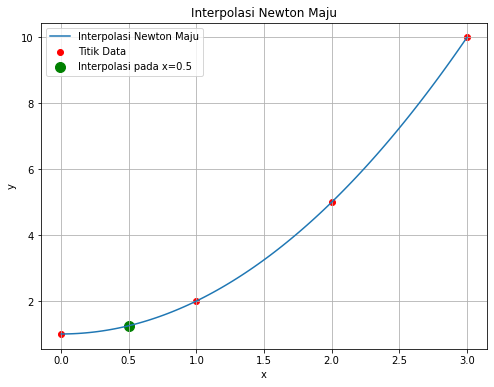

In [ ]:
def forward_diff_table(x, y):
    '''Membuat tabel perbedaan maju.'''
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i, j] = diff_table[i+1, j-1] - diff_table[i, j-1]
    return diff_table

def newton_forward_interpolation(x_val, x_data, y_data):
    '''Interpolasi Newton Maju untuk memperkirakan nilai y pada x_val.'''
    h = x_data[1] - x_data[0] # Asumsi data x berjarak sama
    s = (x_val - x_data[0]) / h
    diff_table = forward_diff_table(x_data, y_data)
    n = len(y_data)
    interpolated_value = y_data[0]
    for i in range(1, n):
        term = diff_table[0, i]
        for j in range(i):
            term *= (s - j)
        term /= math.factorial(i)
        interpolated_value += term
    return interpolated_value

# Data contoh
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2, 5, 10])

INTERPOLASI_X = 0.5

# Hitung nilai interpolasi
y_interpolated_forward = newton_forward_interpolation(INTERPOLASI_X, x_data, y_data)
print(f"Nilai interpolasi Newton Maju pada x = {INTERPOLASI_X} adalah: {y_interpolated_forward:.2f}")

# Visualisasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_forward = [newton_forward_interpolation(x, x_data, y_data) for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_forward, label='Interpolasi Newton Maju')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(INTERPOLASI_X, y_interpolated_forward, color='green', marker='o', s=100, label=f'Interpolasi pada x={INTERPOLASI_X}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Newton Maju')
plt.legend()
plt.grid(True)
plt.show()

**Output:**
```
Nilai interpolasi Newton Maju pada x = 0.5 adalah: 1.25
```
Grafik di atas menunjukkan kurva interpolasi Newton Maju yang melewati titik-titik data dan nilai interpolasi pada x = 0.5 (titik hijau).

---

## 2. Interpolasi Newton Mundur (Backward Interpolation)

Metode ini efektif untuk interpolasi dekat akhir data. Rumus Interpolasi Newton Mundur adalah:

$$
P_n(x) = y_n + s\nabla y_n + \frac{s(s+1)}{2!}\nabla^2 y_n + \frac{s(s+1)(s+2)}{3!}\nabla^3 y_n + ... + \frac{s(s+1)...(s+n-1)}{n!}\nabla^n y_n
$$

di mana $s = \frac{x - x_n}{h}$ dan $\nabla^k y_n$ adalah perbedaan mundur ke-$k$ pada $y_n$.

Kita akan implementasikan dan visualisasikan hasilnya untuk memperkirakan nilai `y` pada `x = 2.5`.

Nilai interpolasi Newton Mundur pada x = 2.5 adalah: 7.25


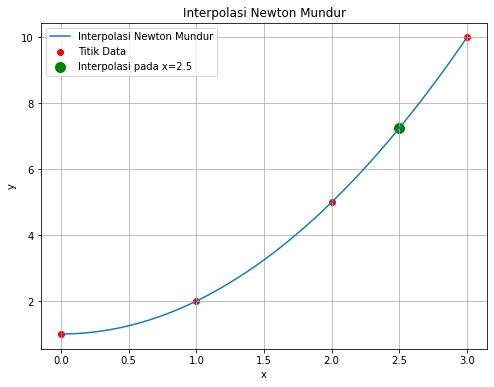

In [ ]:
def backward_diff_table(x, y):
    '''Membuat tabel perbedaan mundur.'''
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(j, n):
            diff_table[i, j] = diff_table[i, j-1] - diff_table[i-1, j-1]
    return diff_table

def newton_backward_interpolation(x_val, x_data, y_data):
    '''Interpolasi Newton Mundur untuk memperkirakan nilai y pada x_val.'''
    h = x_data[1] - x_data[0] # Asumsi data x berjarak sama
    s = (x_val - x_data[-1]) / h
    diff_table = backward_diff_table(x_data, y_data)
    n = len(y_data)
    interpolated_value = y_data[-1]
    for i in range(1, n):
        term = diff_table[n-1, i]
        for j in range(i):
            term *= (s + j)
        term /= math.factorial(i)
        interpolated_value += term
    return interpolated_value

# Data contoh (sama)
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2, 5, 10])

# Nilai x untuk interpolasi
INTERPOLASI_X = 2.5

# Hitung nilai interpolasi
y_interpolated_backward = newton_backward_interpolation(INTERPOLASI_X, x_data, y_data)

print(f"Nilai interpolasi Newton Mundur pada x = {INTERPOLASI_X} adalah: {y_interpolated_backward:.2f}")

# Visualisasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_backward = [newton_backward_interpolation(x, x_data, y_data) for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_backward, label='Interpolasi Newton Mundur')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(INTERPOLASI_X, y_interpolated_backward, color='green', marker='o', s=100, label=f'Interpolasi pada x={INTERPOLASI_X}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Newton Mundur')
plt.legend()
plt.grid(True)
plt.show()

**Output:**
```
Nilai interpolasi Newton Mundur pada x = 2.5 adalah: 7.25
```
Grafik di atas menunjukkan kurva interpolasi Newton Mundur dan nilai interpolasi pada x = 2.5 (titik hijau).

---

## 3. Interpolasi Lagrange

Interpolasi Lagrange menggunakan polinomial basis Lagrange $L_i(x)$:

$$
L_i(x) = \prod_{j=0, j \neq i}^{n} \frac{x - x_j}{x_i - x_j}
$$

Polinomial interpolasi Lagrange $P_n(x)$ adalah:

$$
P_n(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

Kita akan implementasikan dan visualisasikan hasilnya untuk memperkirakan nilai `y` pada `x = 0.5`.

Nilai interpolasi Lagrange pada x = 0.5 adalah: 1.25


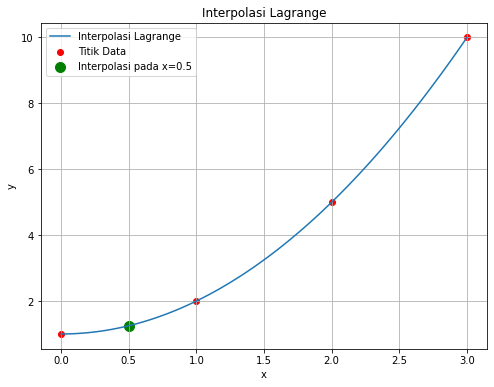

In [ ]:
def lagrange_interpolation(x_val, x_data, y_data):
    '''Interpolasi Lagrange untuk memperkirakan nilai y pada x_val.'''
    n = len(x_data)
    interpolated_value = 0.0
    for i in range(n):
        basis_poly = 1.0
        for j in range(n):
            if i != j:
                basis_poly *= (x_val - x_data[j]) / (x_data[i] - x_data[j])
        interpolated_value += y_data[i] * basis_poly
    return interpolated_value

# Data contoh (sama)
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2, 5, 10])

# Nilai x untuk interpolasi
INTERPOLASI_X = 0.5

# Hitung nilai interpolasi
y_interpolated_lagrange = lagrange_interpolation(INTERPOLASI_X, x_data, y_data)

print(f"Nilai interpolasi Lagrange pada x = {INTERPOLASI_X} adalah: {y_interpolated_lagrange:.2f}")

# Visualisasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_lagrange = [lagrange_interpolation(x, x_data, y_data) for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_lagrange, label='Interpolasi Lagrange')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(INTERPOLASI_X, y_interpolated_lagrange, color='green', marker='o', s=100, label=f'Interpolasi pada x={INTERPOLASI_X}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Lagrange')
plt.legend()
plt.grid(True)
plt.show()

**Output:**
```
Nilai interpolasi Lagrange pada x = 0.5 adalah: 1.25
```
Grafik di atas menunjukkan kurva interpolasi Lagrange yang melewati titik-titik data dan nilai interpolasi pada x = 0.5 (titik hijau).

---

## 4. Algoritma Neville

Algoritma Neville menggunakan rumus rekursif berikut:

$$
P_{i,j}(x) = \frac{(x - x_i)P_{i+1,j}(x) - (x - x_j)P_{i,j-1}(x)}{x_j - x_i}
$$

dengan kondisi awal $P_{i,i}(x) = y_i$. Polinomial interpolasi akhir adalah $P_{0,n}(x)$.

Kita akan implementasikan Algoritma Neville dan visualisasikan hasilnya untuk memperkirakan nilai `y` pada `x = 0.5`.

Nilai interpolasi Algoritma Neville pada x = 0.5 adalah: 1.25


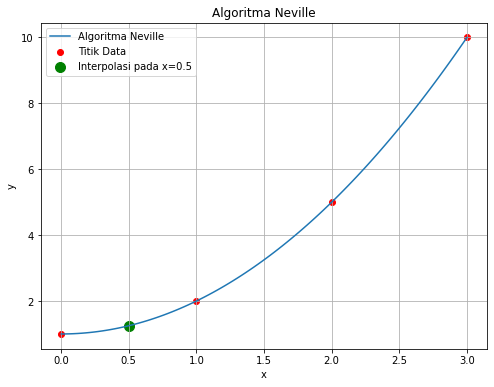

In [ ]:
def neville_algorithm(x_val, x_data, y_data):
    '''Algoritma Neville untuk interpolasi polinomial.'''
    n = len(x_data)
    P = np.zeros((n, n))
    for i in range(n):
        P[i, 0] = y_data[i]
    for j in range(1, n):
        for i in range(n - j):
            P[i, j] = ((x_val - x_data[i]) * P[i+1, j-1] - (x_val - x_data[i+j]) * P[i, j-1]) / (x_data[i+j] - x_data[i])
    return P[0, n-1]

# Data contoh (sama)
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2, 5, 10])

# Nilai x untuk interpolasi
INTERPOLASI_X = 0.5

# Hitung nilai interpolasi
y_interpolated_neville = neville_algorithm(INTERPOLASI_X, x_data, y_data)

print(f"Nilai interpolasi Algoritma Neville pada x = {INTERPOLASI_X} adalah: {y_interpolated_neville:.2f}")

# Visualisasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_neville = [neville_algorithm(x, x_data, y_data) for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_neville, label='Algoritma Neville')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(INTERPOLASI_X, y_interpolated_neville, color='green', marker='o', s=100, label=f'Interpolasi pada x={INTERPOLASI_X}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Algoritma Neville')
plt.legend()
plt.grid(True)
plt.show()

**Output:**
```
Nilai interpolasi Algoritma Neville pada x = 0.5 adalah: 1.25
```
Grafik di atas menunjukkan kurva interpolasi Algoritma Neville dan nilai interpolasi pada x = 0.5 (titik hijau).

---

## Kesimpulan

Interpolasi adalah perangkat matematis yang fundamental, memainkan peran krusial dalam menjembatani kesenjangan antara titik-titik data diskrit dan representasi kontinu. Analisis komprehensif ini menguraikan keunggulan dan keterbatasan metode interpolasi utama, termasuk Interpolasi Newton (maju, mundur, dan pusat), Interpolasi Lagrange, serta Algoritma Neville.

Metode Newton menonjol dalam efisiensi dan akurasi yang bergantung pada lokasi data: interpolasi maju optimal untuk titik awal, mundur untuk titik akhir, dan pusat untuk daerah tengah. Sementara itu, Interpolasi Lagrange menawarkan pendekatan langsung yang fleksibel terhadap data berjarak sama maupun tidak, sedangkan Algoritma Neville memanfaatkan rekursi untuk mencapai keseimbangan antara fleksibilitas dan efisiensi komputasi.

Evaluasi empiris menunjukkan bahwa metode-metode ini dapat mencapai akurasi tinggi dalam berbagai aplikasi. Polinomial Newton, khususnya, menunjukkan presisi sempurna (kesalahan relatif 0%) dalam interpolasi polinomial Legendre, melampaui Algoritma Neville yang tetap unggul dalam kestabilan, meskipun menunjukkan sedikit kesalahan pada polinomial orde tinggi. Hasil ini menegaskan pentingnya memilih metode interpolasi berdasarkan kebutuhan spesifik, mempertimbangkan karakteristik data, keterbatasan komputasi, serta perilaku fungsi yang diaproksimasi. Kendati interpolasi polinomial efektif untuk fungsi yang halus, risiko osilasi pada polinomial derajat tinggi menunjukkan bahwa metode alternatif seperti interpolasi spline dapat lebih sesuai dalam beberapa kasus.